<a href="https://colab.research.google.com/github/JoDeMiro/TimeSeriesLearn/blob/main/02_TSLearn_LB_Keogh_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline


# LB_Keogh

This example illustrates the principle of time series envelope and its
relationship to the "LB_Keogh" lower bound [1].

The envelope of a time series consists of two time series such that the
original time series is between the two time series. Denoting the original
time series $X = (X_i)_{1 \leq i \leq n}$, the envelope of this time
series is an ensemble of two time series of same length
$L = (l_i)_{1 \leq i \leq n}$ and $U = (u_i)_{1 \leq i \leq n}$
such that for all $i \in \{1, \ldots, n\}$:

\begin{align}u_i = \max(x_{i - r}, \ldots, x_{i + r})

    l_i = \min(x_{i - r}, \ldots, x_{i + r})\end{align}

where $r$ is the radius of the envelope.

The distance between a time series $Q$ and an envelope $(L, U)$ is
defined as:

\begin{align}LB_{Keogh}(Q, (L, U)) = \sqrt{\sum_{i=1}^n
    \begin{cases}
          (q_i - u_i)^2 & \text{if $q_i > u_i$}\\
          (q_i - l_i)^2 & \text{if $q_i < l_i$}\\
          0 & \text{otherwise}
    \end{cases}
    }\end{align}

So it is simply the Euclidean distance between $Q$ and the envelope.

[1] E. Keogh and C. A. Ratanamahatana, "Exact indexing of dynamic time
warping". Knowledge and Information Systems, 7(3), 358-386 (2004).


In [1]:
!pip install -q tslearn

     |████████████████████████████████| 793 kB 5.5 MB/s 


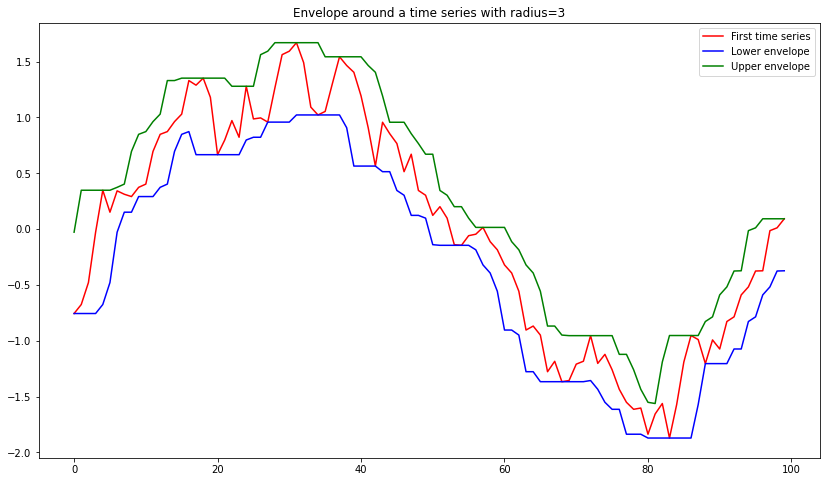

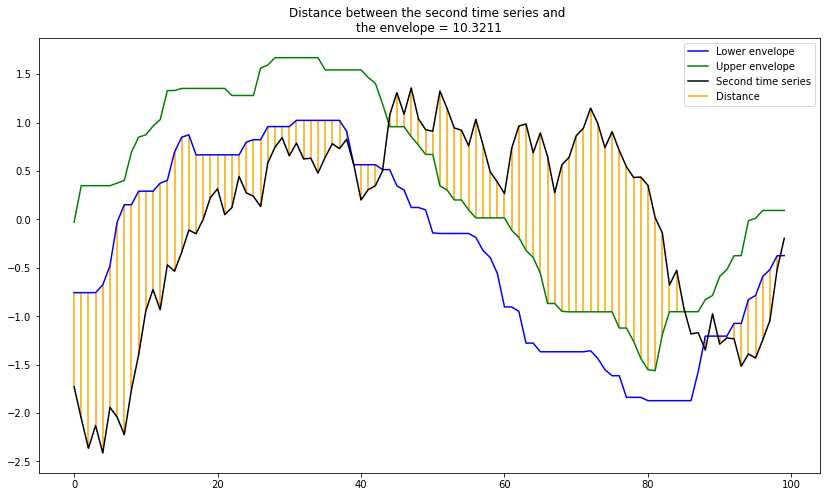

In [2]:
# Author: Romain Tavenard
#         Johann Faouzi
# License: BSD 3 clause
# sphinx_gallery_thumbnail_number = 2

import numpy
import matplotlib.pyplot as plt

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn import metrics

numpy.random.seed(0)
n_ts, sz, d = 2, 100, 1
dataset = random_walks(n_ts=n_ts, sz=sz, d=d)
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset_scaled = scaler.fit_transform(dataset)

plt.figure(figsize=(14, 8))
envelope_down, envelope_up = metrics.lb_envelope(dataset_scaled[0], radius=3)
plt.plot(dataset_scaled[0, :, 0], "r-", label='First time series')
plt.plot(envelope_down[:, 0], "b-", label='Lower envelope')
plt.plot(envelope_up[:, 0], "g-", label='Upper envelope')
plt.legend()
plt.title('Envelope around a time series with radius=3')

plt.figure(figsize=(14, 8))
plt.plot(envelope_down[:, 0], "b-", label='Lower envelope')
plt.plot(envelope_up[:, 0], "g-", label='Upper envelope')
plt.plot(dataset_scaled[1, :, 0], "k-", label='Second time series')
plt.vlines(numpy.arange(sz), dataset_scaled[1, :, 0], numpy.clip(
    dataset_scaled[1, :, 0], envelope_down[:, 0], envelope_up[:, 0]),
           label='Distance', color='orange')
plt.legend()
lb_k_sim = metrics.lb_keogh(dataset_scaled[1],
                            envelope_candidate=(envelope_down, envelope_up))
plt.title('Distance between the second time series and \n'
          'the envelope = {:.4f}'.format(lb_k_sim))

plt.show()